In [1]:
import os
import sys
import logging

import torch
import pandas as pd


import glob
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
book_rating = pd.DataFrame()
for file in glob.glob("../input/goodreads-book-datasets-10m/book*.csv"):
    df = pd.read_csv(file)
    if book_rating.empty:
        book_rating = df
    else:
        book_rating = pd.concat([book_rating,df], axis=0, ignore_index=True)

        
user_rating = pd.DataFrame()
for file in glob.glob("../input/goodreads-book-datasets-10m/user_rating*.csv"):
    df = pd.read_csv(file)
    if user_rating.empty:
        user_rating = df
    else:
        user_rating = pd.concat([user_rating,df], axis=0, ignore_index=True)

In [4]:
book_rating.shape,user_rating.shape

((1850310, 21), (362596, 3))

In [5]:
le = preprocessing.LabelEncoder()
user_rating['Rating_numeric'] = le.fit_transform(user_rating.Rating.values)

In [6]:
user_rating

ID                                     Name           Rating  \
0       6675  Baxter, the Pig Who Wanted to Be Kosher   it was amazing   
1       6675                  Set This House in Order  really liked it   
2       6675                            Paradise Park  really liked it   
3       7027                            Paradise Park         liked it   
4       6675                     The Dead Fish Museum   it was amazing   
...      ...                                      ...              ...   
362591  2090            Ozu and the Poetics of Cinema   it was amazing   
362592  2090            Film History: An Introduction   it was amazing   
362593  2090                Film Art: An Introduction   it was amazing   
362594  2090                                Konfidenz  really liked it   
362595  2097                    لیلا و داستانهای دیگر   it was amazing   

        Rating_numeric  
0                    2  
1                    5  
2                    5  
3                    4  
4                    2  
...                ...  
362591               2  
362592               2  
362593               2  
362594               5  
362595               2  

[362596 rows x 4 columns]

Text(0.5, 1.0, 'Rating split')

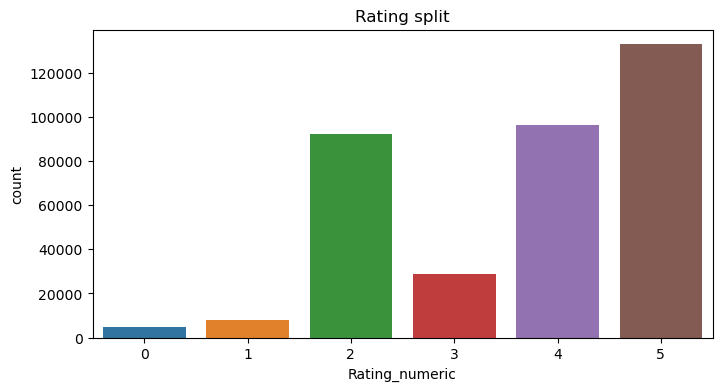

In [7]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x=user_rating["Rating_numeric"])
ax.set_title("Rating split")

Text(0.5, 1.0, 'Rating split')

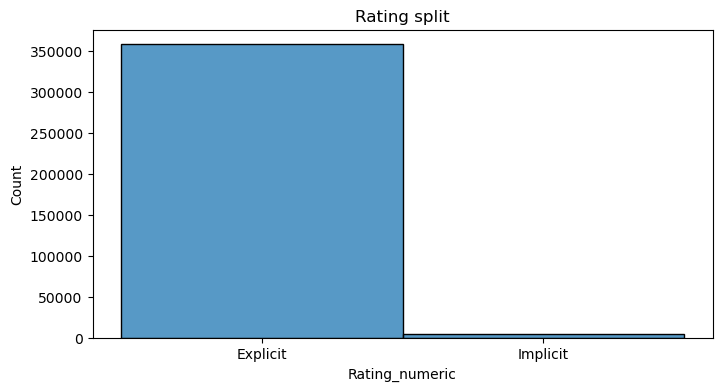

In [13]:
plt.figure(figsize=(8, 4))
imp_vs_exp = user_rating["Rating_numeric"].apply(lambda x: "Implicit" if x == 0 else "Explicit")

ax = sns.histplot(x=imp_vs_exp)
# ax.bar_label(
#     container=ax.containers[0], labels=imp_vs_exp.value_counts().values.round(3)
# )
ax.set_title("Rating split")

In [14]:
user_rating.describe()

ID  Rating_numeric
count  362596.000000   362596.000000
mean     4910.988726        3.660217
std      3261.676702        1.324095
min         1.000000        0.000000
25%      1982.000000        2.000000
50%      4544.000000        4.000000
75%      7777.000000        5.000000
max     10999.000000        5.000000

Text(0.5, 1.0, 'Book popularity distribution')

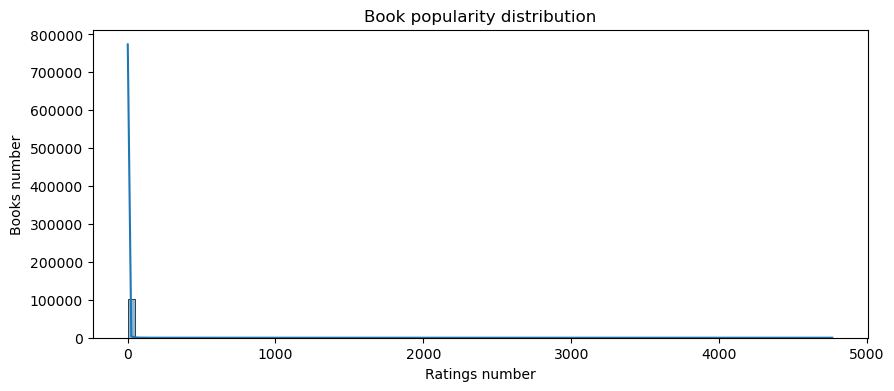

In [15]:
plt.figure(figsize=(10, 4))
ax = sns.histplot(
    data=user_rating.groupby(["Name"]).size().reset_index(name="counts"),
    x="counts",
    bins=100,
    kde=True,
)
ax.set_xlabel("Ratings number")
ax.set_ylabel("Books number")
ax.set_title("Book popularity distribution")

Text(0.5, 1.0, 'User activity distribution')

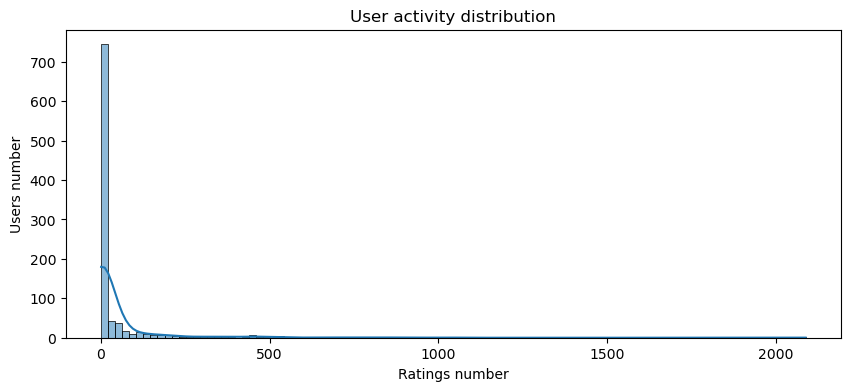

In [16]:
plt.figure(figsize=(10, 4))
ax = sns.histplot(
    data=df.groupby(["ID"]).size().reset_index(name="counts"),
    x="counts",
    bins=100,
    kde=True,
)
ax.set_xlabel("Ratings number")
ax.set_ylabel("Users number")
ax.set_title("User activity distribution")

In [8]:
book_rating = book_rating[(book_rating["Language"] == "eng") | (book_rating["Language"] == "en-US")]
book_rating.head()

RatingDist4 RatingDist1        ISBN            Authors      Id  \
0         4:10         1:2  080959577X    Mrs. Henry Wood  300002   
7       4:1861        1:92  0763621838         Celia Rees  300017   
20         4:0         1:0  0689843798     Annie Auerbach  300036   
24        4:70         1:0  0571207375  Jonathan Sumption  300041   
26      4:1588        1:73  1416525033      Karen Hawkins  300043   

    pagesNumber Language RatingDist3  \
0         487.0      eng         3:5   
7         352.0      eng      3:1700   
20         12.0      eng         3:2   
24        655.0      eng        3:14   
26        313.0      eng      3:1146   

                                                 Name  PublishYear  ...  \
0                                       The Channings         2004  ...   
7                         Sorceress (Witch Child, #2)         2003  ...   
20                                Bob's Recycling Day         2001  ...   
24     Trial by Fire: The Hundred Years War, Volume 2         2001  ...   
26  How to Abduct a Highland Lord (MacLean Curse, #1)         2007  ...   

    RatingDist5 PublishMonth  RatingDist2 PublishDay  RatingDistTotal Rating  \
0          5:13            1          2:4          7         total:34   3.82   
7        5:1281           20        2:474          3       total:5408   3.70   
20          5:2            1          2:0          9          total:4   4.00   
24        5:111           18          2:0          8        total:195   4.50   
26       5:1407           30        2:241          1       total:4455   3.90   

          Publisher Description Count of text reviews  PagesNumber  
0    Wildside Press         NaN                   NaN          NaN  
7        Candlewick         NaN                   NaN          NaN  
20  Simon Spotlight         NaN                   NaN          NaN  
24    Faber & Faber         NaN                   NaN          NaN  
26     Pocket Books         NaN                   NaN          NaN  

[5 rows x 21 columns]

In [9]:
books = book_rating.drop_duplicates(subset='Name', keep="last")

In [18]:
book_rating.to_csv('book_final.csv', index=False)

In [10]:
df = pd.merge(user_rating, books[["Id", "Name"]], on=["Name"], how='inner').dropna()
df = df.rename(columns={"Id": "Book_ID", "ID": "user_id", "Rating_numeric": "rating"}).drop(["Rating"], axis=1)
df

user_id                                               Name  rating  \
0          6675                            Set This House in Order       5   
1          3651                            Set This House in Order       2   
2          4089                            Set This House in Order       5   
3          2071                            Set This House in Order       2   
4          6675                               The Dead Fish Museum       2   
...         ...                                                ...     ...   
188009     2090  Four Films: Annie Hall/Interiors/Manhattan/Sta...       4   
188010     2090       Complete Piano Sonatas, Volume 1 (Nos. 1-15)       2   
188011     2090                                         I, Fellini       5   
188012     2090           The Major Film Theories: An Introduction       4   
188013     2090                          Conversations with Wilder       2   

        Book_ID  
0         71847  
1         71847  
2         71847  
3         71847  
4        145007  
...         ...  
188009   263002  
188010   114621  
188011    82918  
188012    82904  
188013  1292127  

[188014 rows x 4 columns]

Text(0.5, 1.0, 'Rating split')

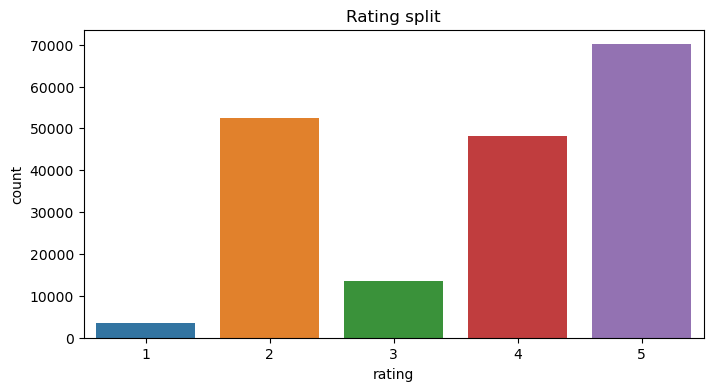

In [11]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x=df["rating"])
ax.set_title("Rating split")

In [12]:
df.describe()

user_id         rating       Book_ID
count  188014.000000  188014.000000  1.880140e+05
mean     4939.113438       3.684295  7.419021e+05
std      3257.159301       1.278502  1.211259e+06
min         1.000000       1.000000  3.000000e+00
25%      2065.000000       2.000000  1.494200e+04
50%      4667.000000       4.000000  8.933800e+04
75%      7777.000000       5.000000  1.188293e+06
max     10997.000000       5.000000  4.846335e+06

In [17]:
df.to_csv('final.csv', index=False)

In [6]:
books = pd.read_csv("../input//bookss/book_final.csv", index_col=0)
ratings = pd.read_csv("../input/bookss/rating_final.csv")

In [7]:
ratings

user_id                                               Name  rating  \
0          6675                            Set This House in Order       5   
1          3651                            Set This House in Order       2   
2          4089                            Set This House in Order       5   
3          2071                            Set This House in Order       2   
4          6675                               The Dead Fish Museum       2   
...         ...                                                ...     ...   
188009     2090  Four Films: Annie Hall/Interiors/Manhattan/Sta...       4   
188010     2090       Complete Piano Sonatas, Volume 1 (Nos. 1-15)       2   
188011     2090                                         I, Fellini       5   
188012     2090           The Major Film Theories: An Introduction       4   
188013     2090                          Conversations with Wilder       2   

        Book_ID  
0         71847  
1         71847  
2         71847  
3         71847  
4        145007  
...         ...  
188009   263002  
188010   114621  
188011    82918  
188012    82904  
188013  1292127  

[188014 rows x 4 columns]

In [8]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [9]:
class TorchEASE:
    def __init__(
        self, train, user_col="user_id", item_col="item_id", score_col=None, reg=0.05, device='cpu'
    ):
        """

        :param train: Training DataFrame of user, item, score(optional) values
        :param user_col: Column name for users
        :param item_col: Column name for items
        :param score_col: Column name for scores. Implicit feedback otherwise
        :param reg: Regularization parameter
        """
        logging.basicConfig(
            format="%(asctime)s [%(levelname)s] %(name)s - %(message)s",
            level=logging.INFO,
            datefmt="%Y-%m-%d %H:%M:%S",
            stream=sys.stdout,
        )

        self.logger = logging.getLogger("notebook")
        self.logger.info("Building user + item lookup")
        # How much regularization do you need?
        self.reg = reg

        self.user_col = user_col
        self.item_col = item_col

        self.user_id_col = user_col + "_id"
        self.item_id_col = item_col + "_id"

        self.user_lookup = self.generate_labels(train, self.user_col)
        self.item_lookup = self.generate_labels(train, self.item_col)

        self.item_map = {}
        self.logger.info("Building item hashmap")
        for _item, _item_id in self.item_lookup.values:
            self.item_map[_item_id] = _item

        train = pd.merge(train, self.user_lookup, on=[self.user_col])
        train = pd.merge(train, self.item_lookup, on=[self.item_col])
        self.logger.info("User + item lookup complete")
        self.indices = torch.LongTensor(
            train[[self.user_id_col, self.item_id_col]].values
        )

        if not score_col:
            # Implicit values only
            self.values = torch.ones(self.indices.shape[0])
        else:
            self.values = torch.FloatTensor(train[score_col])
        # TODO: Is Sparse the best implementation?

        self.sparse = torch.sparse.FloatTensor(self.indices.t(), self.values)

        self.logger.info("Sparse data built")
        self.device = device

    def generate_labels(self, df, col):
        dist_labels = df[[col]].drop_duplicates()
        dist_labels[col + "_id"] = dist_labels[col].astype("category").cat.codes

        return dist_labels

    def fit(self):
        self.logger.info("Building G Matrix")
        G = self.sparse.to_dense().t().to(self.device) @ self.sparse.to_dense().to(self.device)
        G += torch.eye(G.shape[0], device=self.device) * self.reg

        P = G.inverse()

        self.logger.info("Building B matrix")
        B = P / (-1 * P.diag())
        # Set diagonals to 0. TODO: Use .fill_diag_
        B = B + torch.eye(B.shape[0], device=self.device)

        # Predictions for user `_u` will be self.sparse.to_dense()[_u]@self.B
        self.B = B

        return

    def predict_all(self, pred_df, k=5, remove_owned=True):
        """
        :param pred_df: DataFrame of users that need predictions
        :param k: Number of items to recommend to each user
        :param remove_owned: Do you want previously interacted items included?
        :return: DataFrame of users + their predictions in sorted order
        """
        pred_df = pred_df[[self.user_col]].drop_duplicates()
        n_orig = pred_df.shape[0]

        # Alert to number of dropped users in prediction set
        pred_df = pd.merge(pred_df, self.user_lookup, on=[self.user_col])
        n_curr = pred_df.shape[0]
        if n_orig - n_curr:
            self.logger.info(
                "Number of unknown users from prediction data = %i" % (n_orig - n_curr)
            )

        _output_preds = []
        # Select only user_ids in our user data
        _user_tensor = self.sparse.to_dense().index_select(
            dim=0, index=torch.LongTensor(pred_df[self.user_id_col])
        )

        # Make our (raw) predictions
        _preds_tensor = _user_tensor @ self.B
        self.logger.info("Predictions are made")
        if remove_owned:
            # Discount these items by a large factor (much faster than list comp.)
            self.logger.info("Removing owned items")
            _preds_tensor += -1.0 * _user_tensor

        self.logger.info("TopK selected per user")
        for _preds in _preds_tensor:
            # Very quick to use .topk() vs. argmax()
            _output_preds.append(
                [self.item_map[_id] for _id in _preds.topk(k).indices.tolist()]
            )

        pred_df["predicted_items"] = _output_preds
        self.logger.info("Predictions are returned to user")
        return pred_df

In [10]:
te = TorchEASE(ratings, user_col="user_id", item_col="Name", device=device)

In [11]:
%%time
te.fit()

OutOfMemoryError: CUDA out of memory. Tried to allocate 2.82 GiB (GPU 0; 14.76 GiB total capacity; 11.29 GiB already allocated; 2.63 GiB free; 11.30 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
%%time
pred = te.predict_all(df, k=3)
pred

In [ ]:
ter = TorchEASE(df, user_col="user_id", item_col="book_id", score_col="rating")
ter.fit()

In [ ]:
out = ter.predict_all(df, k=3)
out